# Data preprocessing
### data integration and formating 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv('dim_date.csv')
df2 = pd.read_csv('dim_hotels.csv')
df3 = pd.read_csv('dim_rooms.csv')
df4 = pd.read_csv('fact_aggregated_bookings.csv')
df5 = pd.read_csv('fact_bookings.csv')

In [5]:
# Convert dates to date time 
df1['date'] = pd.to_datetime(df1['date'], format='%d-%b-%y')
df4['check_in_date'] = pd.to_datetime(df4['check_in_date'], format='%d-%b-%y')
df5['booking_date'] = pd.to_datetime(df5['booking_date'])
df5['check_in_date'] = pd.to_datetime(df5['check_in_date'])
df5['checkout_date'] = pd.to_datetime(df5['checkout_date'])

In [7]:
booking_merged = pd.merge(df5, df2, on='property_id', how='left')
booking_merged

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [9]:
aggregated_booking_merged = pd.merge(df4, df2, on='property_id', how='left')
aggregated_booking_merged

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city
0,16559,2022-05-01,RT1,25,30,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30,Atliq Palace,Business,Bangalore
3,17558,2022-05-01,RT1,13,19,Atliq Grands,Luxury,Mumbai
4,16558,2022-05-01,RT1,18,19,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,Atliq Palace,Business,Delhi
9196,16559,2022-07-31,RT4,13,18,Atliq Exotica,Luxury,Mumbai
9197,17558,2022-07-31,RT4,3,6,Atliq Grands,Luxury,Mumbai
9198,19563,2022-07-31,RT4,3,6,Atliq Palace,Business,Bangalore


In [11]:
aggregated_booking_merged = pd.merge(aggregated_booking_merged, df3, left_on='room_category', right_on='room_id', how='left')
aggregated_booking_merged


,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,room_id,room_class
0,16559,2022-05-01,RT1,25,30,Atliq Exotica,Luxury,Mumbai,RT1,Standard
1,19562,2022-05-01,RT1,28,30,Atliq Bay,Luxury,Bangalore,RT1,Standard
2,19563,2022-05-01,RT1,23,30,Atliq Palace,Business,Bangalore,RT1,Standard
3,17558,2022-05-01,RT1,13,19,Atliq Grands,Luxury,Mumbai,RT1,Standard
4,16558,2022-05-01,RT1,18,19,Atliq Grands,Luxury,Delhi,RT1,Standard
...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,Atliq Palace,Business,Delhi,RT4,Presidential
9196,16559,2022-07-31,RT4,13,18,Atliq Exotica,Luxury,Mumbai,RT4,Presidential
9197,17558,2022-07-31,RT4,3,6,Atliq Grands,Luxury,Mumbai,RT4,Presidential
9198,19563,2022-07-31,RT4,3,6,Atliq Palace,Business,Bangalore,RT4,Presidential


# Analysis and Visualization

In [14]:
# Calculate total revenue, occupancy percentage, and average ratings
total_revenue = booking_merged['revenue_generated'].sum()
occupancy_percentage = (booking_merged['booking_status'] == 'Checked Out').mean() * 100
average_rating = booking_merged['ratings_given'].mean()

print(f"Total Revenue: {total_revenue}")
print(f"Occupancy Percentage: {occupancy_percentage}%")
print(f"Average Rating: {average_rating}")


Total Revenue: 2007546215
Occupancy Percentage: 70.14711345568021%
Average Rating: 3.619003934160154


In [16]:
# Group by city and property to get key metrics
city_metrics = booking_merged.groupby('city').agg({
    'revenue_generated': 'sum',
    'booking_id': 'count',
    'ratings_given': 'mean'
}).rename(columns={'booking_id': 'total_bookings'})

property_metrics = booking_merged.groupby('property_name').agg({
    'revenue_generated': 'sum',
    'booking_id': 'count',
    'ratings_given': 'mean'
}).rename(columns={'booking_id': 'total_bookings'})

print(city_metrics)
print(property_metrics)


           revenue_generated  total_bookings  ratings_given
city                                                       
Bangalore          494828175           32016       3.407681
Delhi              346451840           24231       3.779015
Hyderabad          381400850           34888       3.661132
Mumbai             784865350           43455       3.650455
               revenue_generated  total_bookings  ratings_given
property_name                                                  
Atliq Bay              305234205           21389       3.708929
Atliq Blu              306638045           21795       3.959650
Atliq City             336647155           23323       3.694799
Atliq Exotica          374711225           23441       3.619241
Atliq Grands           248753815           17035       3.099876
Atliq Palace           357896505           23625       3.749545
Atliq Seasons           77665265            3982       2.294856


In [24]:
# Trend analysis by week
weekly_trends = booking_merged.groupby(booking_merged['booking_date'].dt.isocalendar().week).agg({
    'revenue_generated': 'sum',
    'booking_id': 'count'
}).rename(columns={'booking_id': 'total_bookings'})

weekly_trends



,revenue_generated,total_bookings
week,,
14,2421245,157
15,9483930,635
16,9837630,668
17,86795440,5847
18,165429565,11078
19,146384125,9894
20,151014135,10072
21,148010520,9921
22,150099790,10098


In [26]:
# Occupancy by day type
day_type_occupancy = pd.merge(df4, df1, left_on='check_in_date', right_on='date').groupby('day_type').agg({
    'successful_bookings': 'sum',
    'capacity': 'sum'
})
day_type_occupancy['occupancy_percentage'] = (day_type_occupancy['successful_bookings'] / day_type_occupancy['capacity']) * 100
day_type_occupancy

,successful_bookings,capacity,occupancy_percentage
day_type,,,
weekeday,84365,164320,51.341894
weekend,50225,68256,73.583275


In [28]:
# Booking percentage by platform
platform_booking_percentage = booking_merged['booking_platform'].value_counts(normalize=True) * 100
platform_booking_percentage

booking_platform
others            40.913887
makeyourtrip      19.985140
logtrip           10.963667
direct online      9.940560
tripster           7.155064
journey            6.022736
direct offline     5.018946
Name: proportion, dtype: float64

# Visualization using Graphs

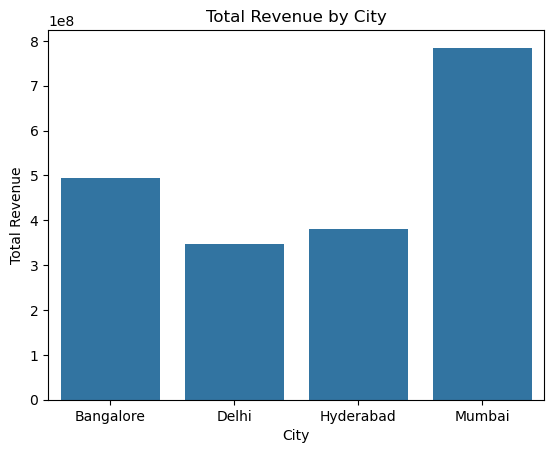

In [34]:
#revenue by cities
sns.barplot(x=city_metrics.index, y=city_metrics['revenue_generated'])
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

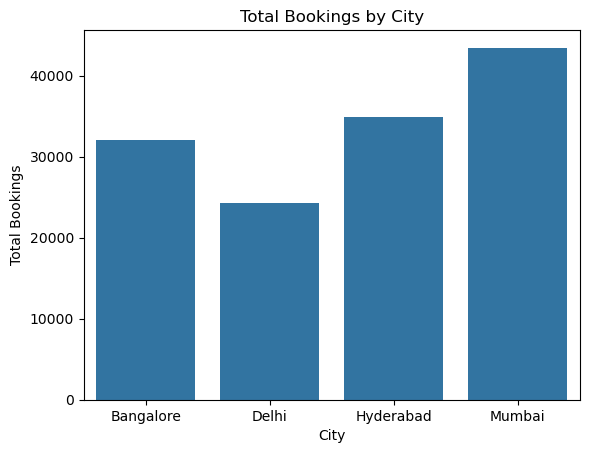

In [36]:
# Bookings by City
sns.barplot(x=city_metrics.index, y=city_metrics['total_bookings'])
plt.title('Total Bookings by City')
plt.xlabel('City')
plt.ylabel('Total Bookings')
plt.show()

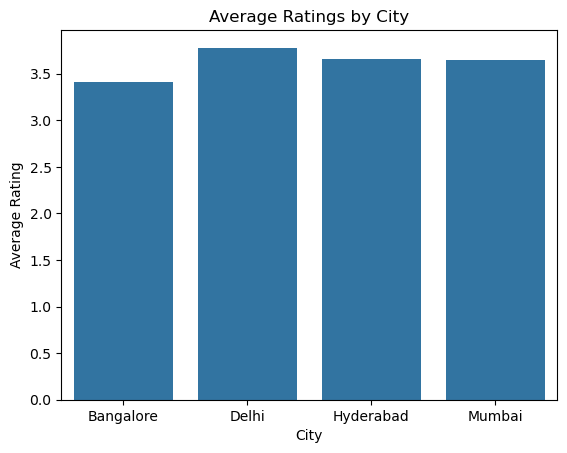

In [54]:
# Average Ratings by City
sns.barplot(x=city_metrics.index, y=city_metrics['ratings_given'])
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

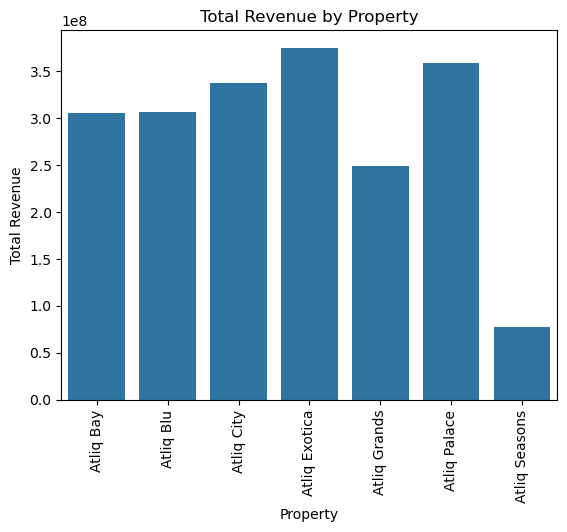

In [56]:
# Total Revenue by Property
sns.barplot(x=property_metrics.index, y=property_metrics['revenue_generated'])
plt.title('Total Revenue by Property')
plt.xlabel('Property')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

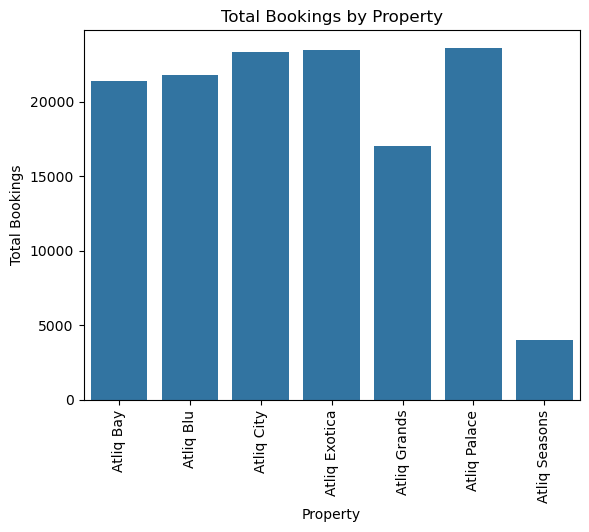

In [58]:
# Total Bookings by Property
sns.barplot(x=property_metrics.index, y=property_metrics['total_bookings'])
plt.title('Total Bookings by Property')
plt.xlabel('Property')
plt.ylabel('Total Bookings')
plt.xticks(rotation=90)
plt.show()

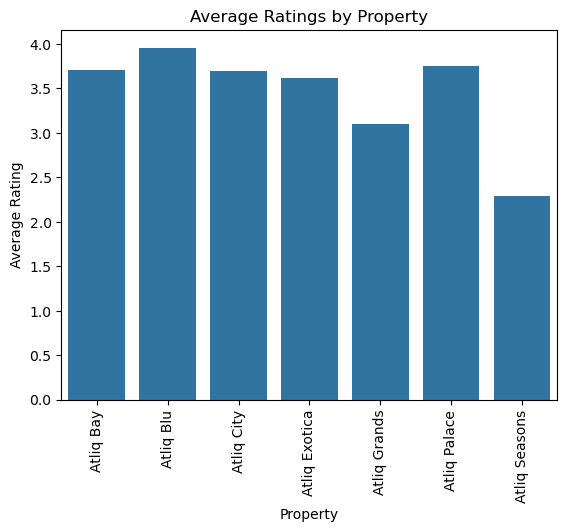

In [60]:
# Average Ratings by Property
sns.barplot(x=property_metrics.index, y=property_metrics['ratings_given'])
plt.title('Average Ratings by Property')
plt.xlabel('Property')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

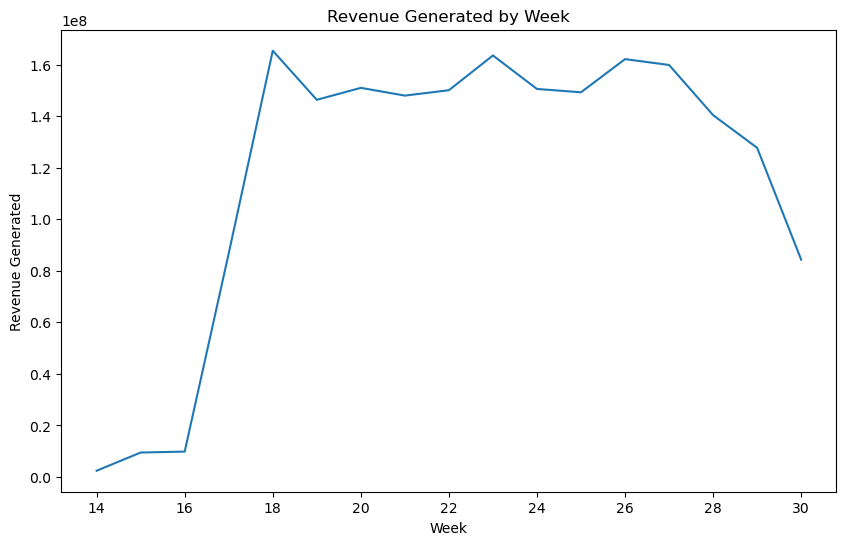

In [46]:
# Revenue Generated by Week
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_trends.index, y=weekly_trends['revenue_generated'])
plt.title('Revenue Generated by Week')
plt.xlabel('Week')
plt.ylabel('Revenue Generated')
plt.show()

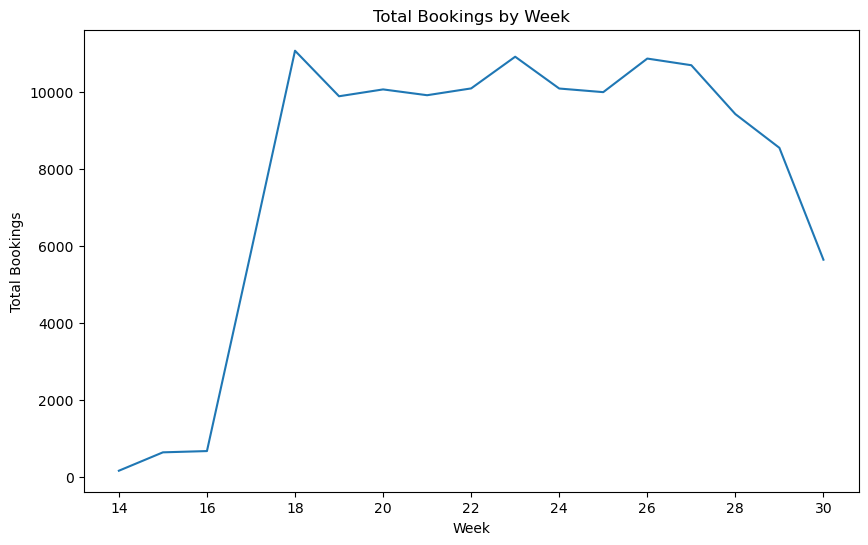

In [48]:
# Total Bookings by Week
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_trends.index, y=weekly_trends['total_bookings'])
plt.title('Total Bookings by Week')
plt.xlabel('Week')
plt.ylabel('Total Bookings')
plt.show()

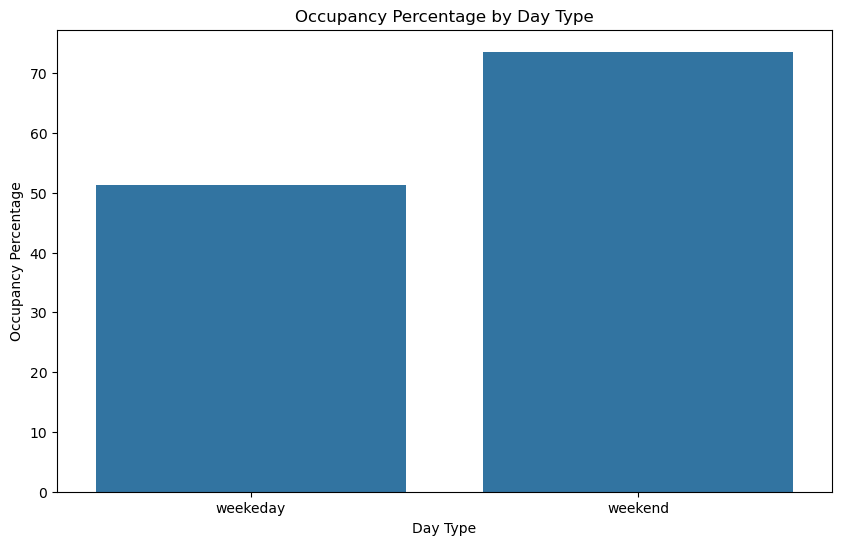

In [50]:
# Occupancy Percentage by Day Type
plt.figure(figsize=(10, 6))
sns.barplot(x=day_type_occupancy.index, y=day_type_occupancy['occupancy_percentage'])
plt.title('Occupancy Percentage by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Occupancy Percentage')
plt.show()

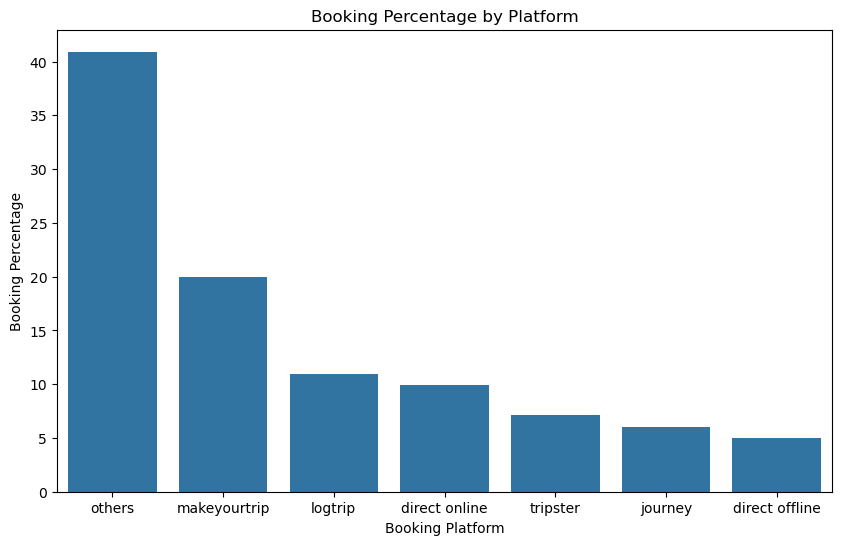

In [52]:
# Booking Percentage by Platform
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_booking_percentage.index, y=platform_booking_percentage)
plt.title('Booking Percentage by Platform')
plt.xlabel('Booking Platform')
plt.ylabel('Booking Percentage')
plt.show()